# Data Preprocessing

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
from IPython.core.interactiveshell import InteractiveShell
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

## Importing and Analyzing Data

In [4]:
#Importing and Analyzing Data
data = pd.read_csv("C:/Users/tharu/OneDrive/Desktop/MS-Sem 2/Additional Courses/GLA/Life Expectancy Data.csv")

In [5]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [8]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

## Splitting Data based on Data Types

In [9]:
# Splitting Data based on Data Types
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [10]:
cat_data=[var for var in data.columns if data[var].dtype=='object']

In [11]:
cat_data=data[cat_data]

In [12]:
cat_data.head()

Country      Status
0  Afghanistan  Developing
1  Afghanistan  Developing
2  Afghanistan  Developing
3  Afghanistan  Developing
4  Afghanistan  Developing

In [13]:
temporal_data = [var for var in data.columns if 'Yr' in var or 'Year' in var]
temporal_data=data[temporal_data]
temporal_data.head()

Year
0  2015
1  2014
2  2013
3  2012
4  2011

In [14]:
num_data=[var for var in data.columns if data[var].dtype!='object'and var not in temporal_data]
num_data=data[num_data]

In [15]:
num_data.head()

Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0              65.0            263.0             62     0.01   
1              59.9            271.0             64     0.01   
2              59.9            268.0             66     0.01   
3              59.5            272.0             69     0.01   
4              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [16]:
disc_data=[var for var in data.columns if data[var].dtype=='int64' and var!='Year']

In [17]:
disc_data=data[disc_data]

In [18]:
disc_data.head()

infant deaths  Measles   under-five deaths 
0             62      1154                  83
1             64       492                  86
2             66       430                  89
3             69      2787                  93
4             71      3013                  97

In [19]:
cont_data=[var for var in data.columns if data[var].dtype!='object' and data[var].dtype=='float64' and var not in temporal_data]

In [20]:
cont_data=data[cont_data]

In [21]:
cont_data.head()

Life expectancy   Adult Mortality  Alcohol  percentage expenditure  \
0              65.0            263.0     0.01               71.279624   
1              59.9            271.0     0.01               73.523582   
2              59.9            268.0     0.01               73.219243   
3              59.5            272.0     0.01               78.184215   
4              59.2            275.0     0.01                7.097109   

   Hepatitis B   BMI   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0         65.0   19.1    6.0               8.16         65.0        0.1   
1         62.0   18.6   58.0               8.18         62.0        0.1   
2         64.0   18.1   62.0               8.13         64.0        0.1   
3         67.0   17.6   67.0               8.52         67.0        0.1   
4         68.0   17.2   68.0               7.87         68.0        0.1   

          GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0  584.259210  33736494.0                   17.2                 17.3   
1  612.696514    327582.0                   17.5                 17.5   
2  631.744976  31731688.0                   17.7                 17.7   
3  669.959000   3696958.0                   17.9                 18.0   
4   63.537231   2978599.0                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

## Crazy Variables

In [22]:
#Crazy Variables

#1.BMI
data[data[' BMI ']<12]

Country  Year      Status  Life expectancy   \
25                Albania  2006  Developing              74.2   
40                Algeria  2007  Developing              73.8   
53                 Angola  2010  Developing              49.6   
75    Antigua and Barbuda  2004  Developing              74.4   
76    Antigua and Barbuda  2003  Developing              74.2   
...                   ...   ...         ...               ...   
2891                Yemen  2014  Developing              65.4   
2911               Zambia  2010  Developing              58.0   
2912               Zambia  2009  Developing              57.4   
2924             Zimbabwe  2013  Developing              58.0   
2925             Zimbabwe  2012  Developing              56.6   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
25               99.0              1     5.31                3.302154   
40              129.0             20     0.44              320.323924   
53              365.0             78     7.80              191.653741   
75              149.0              0     7.28               22.862952   
76              151.0              0     7.16             1158.065259   
...               ...            ...      ...                     ...   
2891            228.0             37     0.01                0.000000   
2911            363.0             30     2.47              184.364910   
2912            368.0             30     2.30              143.869887   
2924            399.0             25     6.39               10.666707   
2925            429.0             26     6.09               92.602336   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  \
25           98.0        68    5.8                   1   97.0   
40            9.0         0    5.8                  23   95.0   
53           77.0      1190    2.4                 121   81.0   
75           97.0         0    4.8                   0   97.0   
76           99.0         0    4.1                   0   99.0   
...           ...       ...    ...                 ...    ...   
2891         73.0       815    4.4                  47   67.0   
2911         83.0     15754    2.7                  45    8.0   
2912         94.0        26    2.2                  47   93.0   
2924         95.0         0    3.8                  36   95.0   
2925         97.0         0    3.3                  39   95.0   

      Total expenditure  Diphtheria    HIV/AIDS          GDP  Population  \
25                 5.86         97.0        0.1    35.129300   2992547.0   
40                 3.82         95.0        0.1  3935.183343     34376.0   
53                 3.39         77.0        2.5  3529.534820  23369131.0   
75                 4.21         97.0        0.1  1352.837400         NaN   
76                 4.53         99.0        0.1  9739.825560         NaN   
...                 ...          ...        ...          ...         ...   
2891               5.64         73.0        0.1          NaN         NaN   
2911               4.41         83.0        6.8  1463.213573    138533.0   
2912               4.73         94.0        9.1  1139.112330  13456417.0   
2924               6.88         95.0        6.8   111.227396    155456.0   
2925               6.69         95.0        8.8   955.648466   1471826.0   

       thinness  1-19 years   thinness 5-9 years  \
25                      1.7                  1.8   
40                      6.0                  5.9   
53                      9.1                  9.0   
75                      3.5                  3.4   
76                      3.5                  3.5   
...                     ...                  ...   
2891                   13.7                 13.5   
2911                    6.7                  6.5   
2912                    6.7                  6.6   
2924                    6.2                  6.0   
2925                    6.5                  6.4   

      Income composition of resources  Sc

In [23]:
data[' BMI ']=data[' BMI '].mask(data[' BMI ']<12,12)

In [24]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [25]:
data[' BMI '].min()

12.0

## Data Visualization

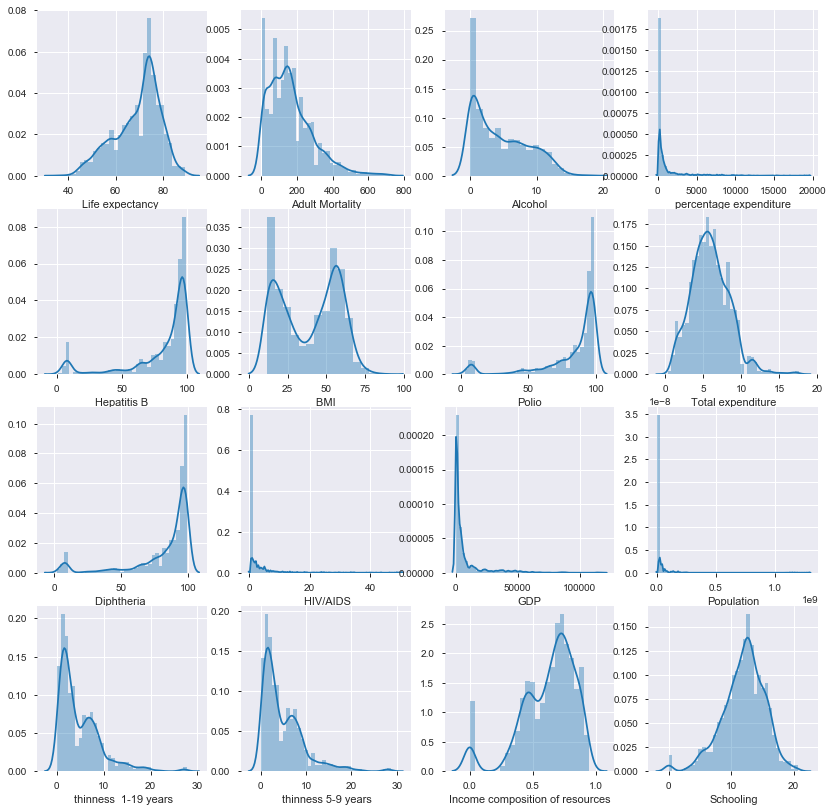

In [28]:
fig, axs = plt.subplots(ncols=4, nrows=4,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(cont_data):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

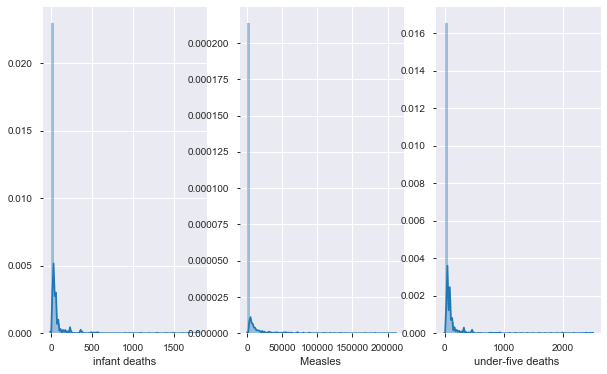

In [29]:
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(10,6))
axs = axs.flatten()

for i, var in enumerate(disc_data):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

In [37]:
#Check for Correlation
data.corr()

Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.118573          0.597397        -0.408430   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure                0.090740          0.218086        -0.115281   
Diphtheria                       0.134337          0.479495        -0.275131   
 HIV/AIDS                       -0.139741         -0.556556         0.523821   
GDP                              0.101620          0.461455        -0.296049   
Population                       0.016969         -0.021538        -0.013647   
 thinness  1-19 years           -0.047876         -0.477183         0.302904   
 thinness 5-9 years             -0.050929         -0.471584         0.308457   
Income composition of resources  0.243468          0.724776        -0.457626   
Schooling                        0.209400          0.751975        -0.454612   

                                 infant deaths   Alcohol  \
Year                                 -0.037415 -0.052990   
Life expectancy                      -0.196557  0.404877   
Adult Mortality                       0.078756 -0.195848   
infant deaths                         1.000000 -0.115638   
Alcohol                              -0.115638  1.000000   
percentage expenditure               -0.085612  0.341285   
Hepatitis B                          -0.223566  0.087549   
Measles                               0.501128 -0.051827   
 BMI                                 -0.241220  0.347206   
under-five deaths                     0.996629 -0.112370   
Polio                                -0.170689  0.221734   
Total expenditure                    -0.128616  0.296942   
Diphtheria                           -0.175171  0.222020   
 HIV/AIDS                             0.025231 -0.048845   
GDP                                  -0.108427  0.354712   
Population                            0.556801 -0.035252   
 thinness  1-19 years                 0.465711 -0.428795   
 thinness 5-9 years                   0.471350 -0.417414   
Income composition of resources      -0.145139  0.450040   
Schooling                            -0.193720  0.547378   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.031400     0.104333   
Life expectancy                                0.381864     0.256762   
Adult Mortality                               -0.242860    -0.162476   
infant deaths                                 -0.085612    -0.223566   
Alcohol                                        0.341285     0.087549   
percentage expenditure                         1.000000     0.016274   
Hepatitis B                                    0.016274     1.000000   
Measles                                       -0.056596    -0.120529   
 BMI                                           0.238225     0.159038   
under-five deaths                             -0.087852    -0.233126   
Polio                                          0.147259     0.486171   
Total expenditure                              0.174420     0.058280   
Diphtheria                                     0.143624     0.611495   
 HIV/AIDS                                     -0.097857    -0.112675   
GDP            

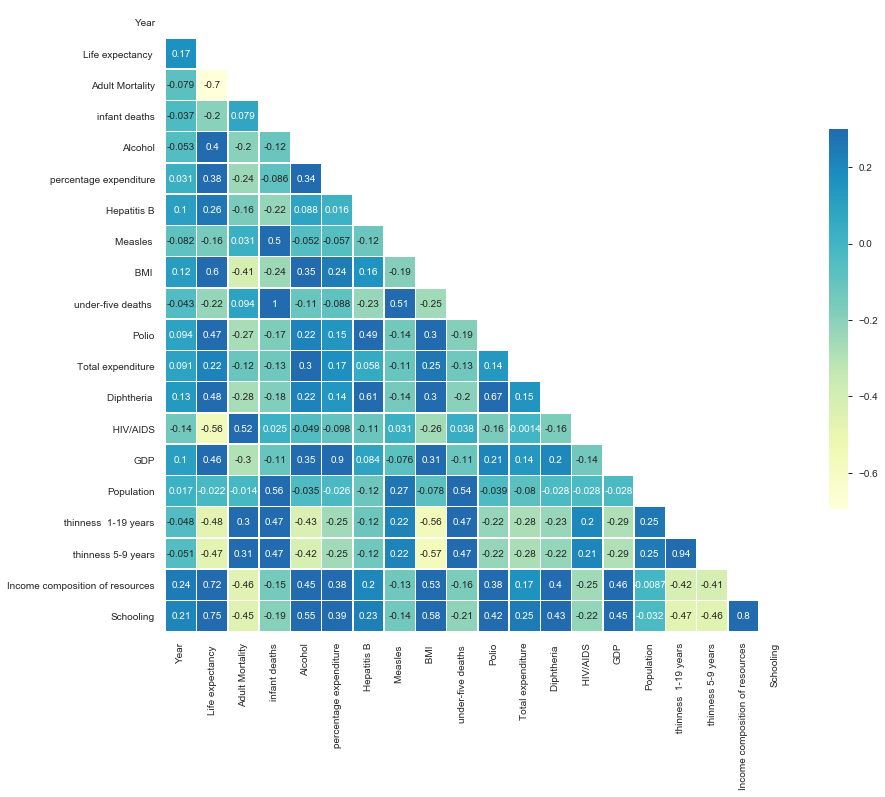

In [38]:

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(),annot=True, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})


<Figure size 1008x1008 with 0 Axes>

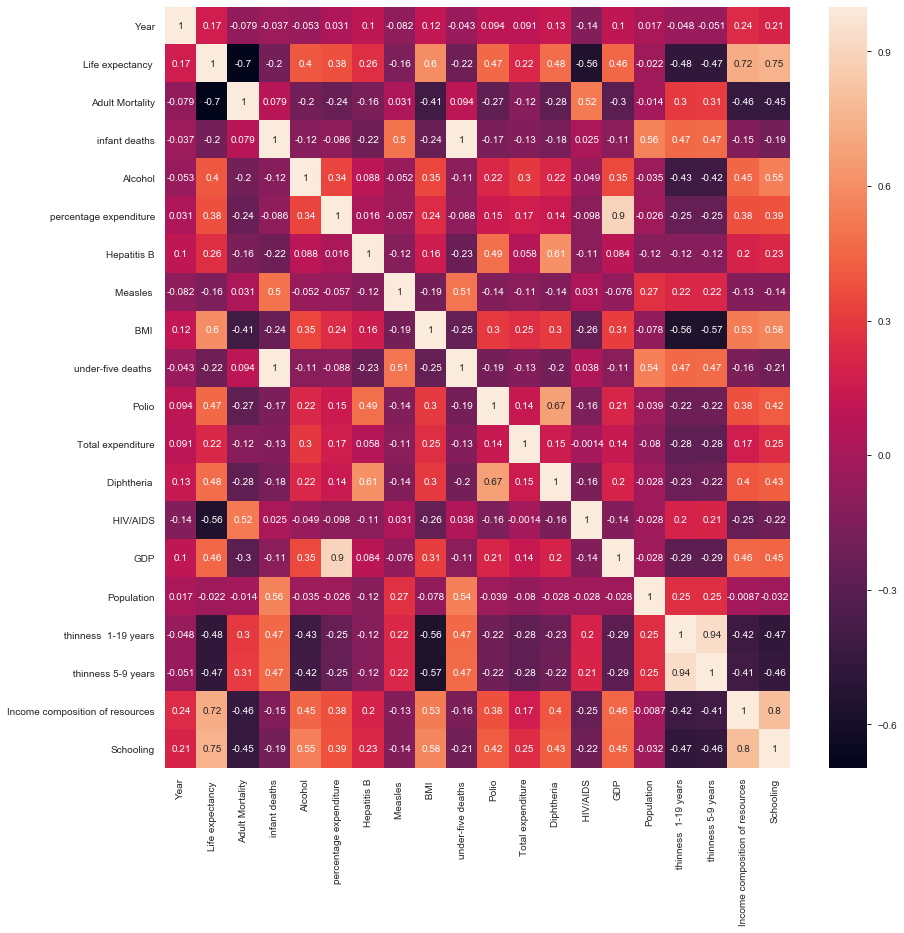

In [39]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(),annot=True)

## Exploratory Data Analysis

### Step-1 Handling Null 

In [40]:
#EDA
#Step-1 Handling Null
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [41]:
null_val=data.isnull().mean()
print("Null values in each Column- \n{} ".format(round(null_val*100),2))

Null values in each Column- 
Country                             0.0
Year                                0.0
Status                              0.0
Life expectancy                     0.0
Adult Mortality                     0.0
infant deaths                       0.0
Alcohol                             7.0
percentage expenditure              0.0
Hepatitis B                        19.0
Measles                             0.0
 BMI                                1.0
under-five deaths                   0.0
Polio                               1.0
Total expenditure                   8.0
Diphtheria                          1.0
 HIV/AIDS                           0.0
GDP                                15.0
Population                         22.0
 thinness  1-19 years               1.0
 thinness 5-9 years                 1.0
Income composition of resources     6.0
Schooling                           6.0
dtype: float64 


In [42]:
data.tail(45)

Country  Year      Status  Life expectancy   Adult Mortality  \
2893     Yemen  2012  Developing              64.7            236.0   
2894     Yemen  2011  Developing              64.6            234.0   
2895     Yemen  2010  Developing              64.4            233.0   
2896     Yemen  2009  Developing              64.1            235.0   
2897     Yemen  2008  Developing              63.8            238.0   
2898     Yemen  2007  Developing              63.4             24.0   
2899     Yemen  2006  Developing              63.0            242.0   
2900     Yemen  2005  Developing              62.6            245.0   
2901     Yemen  2004  Developing              62.2            247.0   
2902     Yemen  2003  Developing              61.9            249.0   
2903     Yemen  2002  Developing              61.5             25.0   
2904     Yemen  2001  Developing              61.1            251.0   
2905     Yemen  2000  Developing              68.0            252.0   
2906    Zambia  2015  Developing              61.8             33.0   
2907    Zambia  2014  Developing              61.1            314.0   
2908    Zambia  2013  Developing              63.0            328.0   
2909    Zambia  2012  Developing              59.2            349.0   
2910    Zambia  2011  Developing              58.2            366.0   
2911    Zambia  2010  Developing              58.0            363.0   
2912    Zambia  2009  Developing              57.4            368.0   
2913    Zambia  2008  Developing              55.7             45.0   
2914    Zambia  2007  Developing              52.6            487.0   
2915    Zambia  2006  Developing              58.0            526.0   
2916    Zambia  2005  Developing              49.3            554.0   
2917    Zambia  2004  Developing              47.9            578.0   
2918    Zambia  2003  Developing              46.4             64.0   
2919    Zambia  2002  Developing              45.5             69.0   
2920    Zambia  2001  Developing              44.6            611.0   
2921    Zambia  2000  Developing              43.8            614.0   
2922  Zimbabwe  2015  Developing              67.0            336.0   
2923  Zimbabwe  2014  Developing              59.2            371.0   
2924  Zimbabwe  2013  Developing              58.0            399.0   
2925  Zimbabwe  2012  Developing              56.6            429.0   
2926  Zimbabwe  2011  Developing              54.9            464.0   
2927  Zimbabwe  2010  Developing              52.4            527.0   
2928  Zimbabwe  2009  Developing              50.0            587.0   
2929  Zimbabwe  2008  Developing              48.2            632.0   
2930  Zimbabwe  2007  Developing              46.6             67.0   
2931  Zimbabwe  2006  Developing              45.4              7.0   
2932  Zimbabwe  2005  Developing              44.6            717.0   
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2893             36     0.04                0.000000         67.0      2177   
2894             35     0.04                0.000000         69.0      2676   
2895             35     0.06                0.000000         76.0       510   
2896             36     0.03                0.000000         76.0       130   
2897             37     0.04                0.000000         78.0         7   
2898             38     0.05                0.000000         79.0        13   
2899             39     0.04                0.000000         78.0      8079   
2900             40     0.04                0.000000          8.0      6285   
2901             42     0.06 

In [26]:
import pandas_profiling as pp
pp.ProfileReport(data)

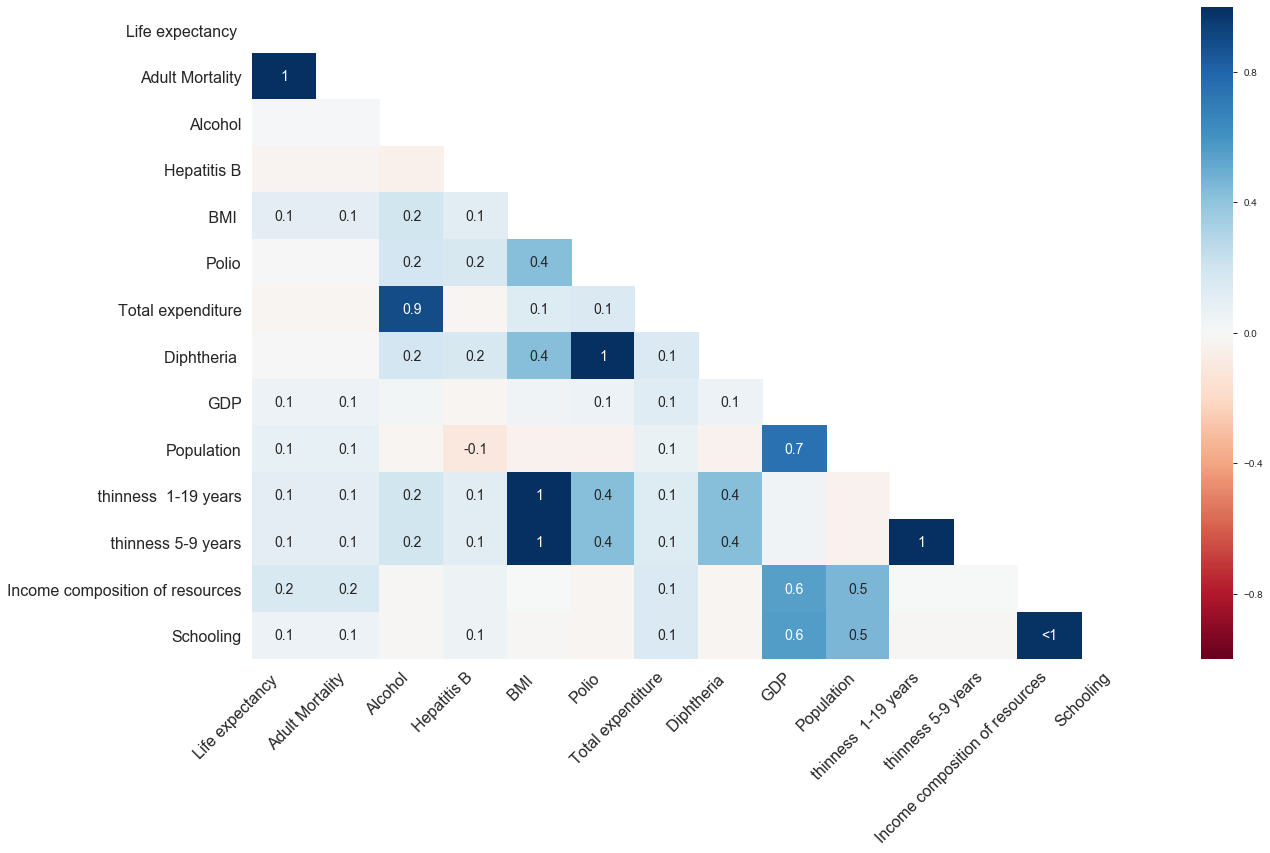

In [43]:
import missingno as msno
msno.heatmap(data)

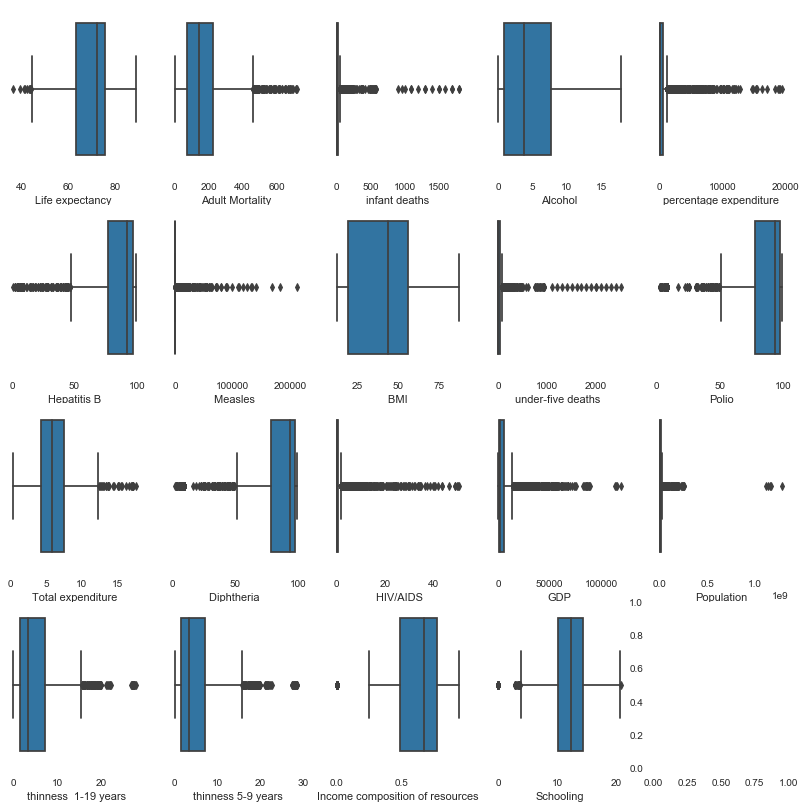

In [44]:
fig, axs = plt.subplots(ncols=5, nrows=4,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(num_data):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

In [30]:
# Crazy Variables
# 2 Percentage_expenditure, under_five_death, measles,infant_deaths (they had zeros has their null values)
#Changing them to Null
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [31]:
data['percentage expenditure'].replace(0,np.nan,inplace=True)

In [32]:
data['infant deaths'].replace(0,np.nan,inplace=True)

In [33]:
data['under-five deaths '].replace(0,np.nan,inplace=True)

In [34]:
data['Measles '].replace(0,np.nan,inplace=True)

In [35]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                      848
Alcohol                            194
percentage expenditure             611
Hepatitis B                        553
Measles                            983
 BMI                                34
under-five deaths                  785
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [36]:
#Dropping Highly correlated Columns

#data.drop('infant deaths',axis=1,inplace=True)

In [152]:
#data.drop(' thinness 5-9 years',axis=1,inplace=True)

In [37]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0           62.0     0.01               71.279624         65.0    1154.0   
1           64.0     0.01               73.523582         62.0     492.0   
2           66.0     0.01               73.219243         64.0     430.0   
3           69.0     0.01               78.184215         67.0    2787.0   
4           71.0     0.01                7.097109         68.0    3013.0   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                83.0    6.0               8.16         65.0   
1   18.6                86.0   58.0               8.18         62.0   
2   18.1                89.0   62.0               8.13         64.0   
3   17.6                93.0   67.0               8.52         67.0   
4   17.2                97.0   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Alcohol                            2744 non-null float64
percentage expenditure             2327 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            1955 non-null float64
 BMI                               2904 non-null float64
under-five deaths                  2153 non-null float64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2490 no

In [34]:
null_val=data.isnull().mean()
print("Null values in each Column- \n{} ".format(null_val*100))

Null values in each Column- 
Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                      28.863172
Alcohol                             6.603131
percentage expenditure             20.796460
Hepatitis B                        18.822328
Measles                            33.458135
 BMI                                1.157250
under-five deaths                  26.718856
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                 

In [56]:
null_val=data.isnull().mean()
null_val

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
Alcohol                            0.066031
percentage expenditure             0.207965
Hepatitis B                        0.188223
Measles                            0.334581
 BMI                               0.011572
under-five deaths                  0.267189
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [38]:
num_data=[var for var in data.columns if data[var].dtype!='object'and var not in temporal_data]
num_data=data[num_data]

In [39]:
mean_median_columns = [var for var in num_data if (data[var].isnull().mean()<0.35 
                                                     and data[var].isnull().mean()>0  and var!= 'Life expectancy ')]
mean_median_columns

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [34]:
type(mean_median_columns)

list

### Encoding Categorical Variables

In [40]:
status = pd.get_dummies(data['Status'],drop_first=True)
country = pd.get_dummies(data['Country'],drop_first=True)
data.drop(['Status'],axis=1,inplace=True)
data.drop(['Country'],axis=1,inplace=True)
life_exp_data = pd.concat([data,status,country],axis=1)

In [41]:
life_exp_data.head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0           62.0     0.01   
1  2014              59.9            271.0           64.0     0.01   
2  2013              59.9            268.0           66.0     0.01   
3  2012              59.5            272.0           69.0     0.01   
4  2011              59.2            275.0           71.0     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0    1154.0   19.1                83.0   
1               73.523582         62.0     492.0   18.6                86.0   
2               73.219243         64.0     430.0   18.1                89.0   
3               78.184215         67.0    2787.0   17.6                93.0   
4                7.097109         68.0    3013.0   17.2                97.0   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Developing  Albania  Algeria  \
0                            0.479       10.1           1        0        0   
1                            0.476       10.0           1        0        0   
2                            0.470        9.9           1        0        0   
3                            0.463        9.8           1        0        0   
4                            0.454        9.5           1        0        0   

   Angola  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
0       0                    0          0        0          0        0   
1       0                    0          0        0          0        0   
2       0                    0          0        0          0        0   
3       0                    0          0        0          0        0   
4       0                    0          0        0          0        0   

   Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  \
0           0        0        0           0         0        0        0   
1           0        0        0           0         0        0        0   
2           0        0        0           0         0        0        0   
3           0        0        0           0         0        0        0   
4           0        0        0           0         0        0        0   

   Belize  Benin  Bhutan  Bolivia (Plurinational State of)  \
0       0      0       0                                 0   
1       0      0       0                                 0   
2       0      0       0                                 0   
3       0      0       0                                 0   
4       0      0       0                                 0   

   Bosnia and Herzegovina  Botswana  Brazil  Brunei Darussalam  Bulgaria  \
0                       0         0       0                  0         0   
1                       0         0       0                  0         0   
2                       0         0       0                  0         0   
3                       0         0       0                  0         0   
4                       0         0       0                  0         0   

   Burkina Faso  Burundi  Cabo Verde  Cambodia  Cameroon  Canada  \
0             0        0           0         0         0       0   


In [42]:
life_exp_data.tail()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
2933  2004              44.3            723.0           27.0     4.36   
2934  2003              44.5            715.0           26.0     4.06   
2935  2002              44.8             73.0           25.0     4.43   
2936  2001              45.3            686.0           25.0     1.72   
2937  2000              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
2933                     NaN         68.0      31.0   27.1   
2934                     NaN          7.0     998.0   26.7   
2935                     NaN         73.0     304.0   26.3   
2936                     NaN         76.0     529.0   25.9   
2937                     NaN         79.0    1483.0   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
2933                42.0   67.0               7.13         65.0       33.6   
2934                41.0    7.0               6.52         68.0       36.7   
2935                40.0   73.0               6.53         71.0       39.8   
2936                39.0   76.0               6.16         75.0       42.1   
2937                39.0   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358879  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  Developing  Albania  \
2933                            0.407        9.2           1        0   
2934                            0.418        9.5           1        0   
2935                            0.427       10.0           1        0   
2936                            0.427        9.8           1        0   
2937                            0.434        9.8           1        0   

      Algeria  Angola  Antigua and Barbuda  Argentina  Armenia  Australia  \
2933        0       0                    0          0        0          0   
2934        0       0                    0          0        0          0   
2935        0       0                    0          0        0          0   
2936        0       0                    0          0        0          0   
2937        0       0                    0          0        0          0   

      Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  \
2933        0           0        0        0           0         0        0   
2934        0           0        0        0           0         0        0   
2935        0           0        0        0           0         0        0   
2936        0           0        0        0           0         0        0   
2937        0           0        0        0           0         0        0   

      Belgium  Belize  Benin  Bhutan  Bolivia (Plurinational State of)  \
2933        0       0      0       0                                 0   
2934        0       0      0       0                                 0   
2935        0       0      0       0                                 0   
2936        0       0      0       0                                 0   
2937        0       0      0       0                                 0   

      Bosnia and Herzegovina  Botswana  Brazil  Brunei Darussalam  Bulgaria  \
2933                       0         0       0                  0         0   
2934                       0         0       0                  0         0   
2935                       0         0       0                  0         0   
2936                       0         0       0                  0         0   
2937                       0         0       0           

<Figure size 720x432 with 0 Axes>

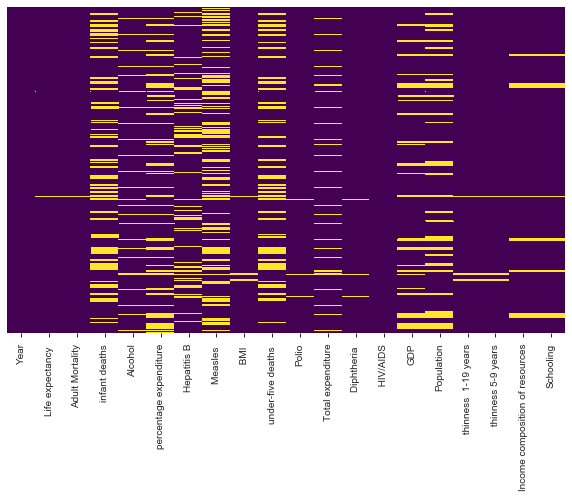

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
life_exp_data['Life expectancy '].fillna(life_exp_data['Life expectancy '].median(),inplace=True)

In [45]:
life_exp_data['Life expectancy '].isnull().sum()

0

In [46]:
X=life_exp_data.drop('Life expectancy ',axis=1)
y=life_exp_data['Life expectancy ']
print(X.shape,' ', y.shape)

(2938, 212)   (2938,)


# Separate datasets into training and testing set 

In [47]:
# let's separate into training and testing set
# to split the data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X_train.shape, y_train.shape

((2056, 212), (2056,))

## To impute missing data with feature-engine

In [48]:
# to impute missing data with feature-engine
from feature_engine.missing_data_imputers import MeanMedianImputer

In [49]:
median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=mean_median_columns)

median_imputer.fit(X_train)
X_train=median_imputer.transform(X_train)
X_test=median_imputer.transform(X_test)

MeanMedianImputer(imputation_method='median',
                  variables=['Adult Mortality', 'infant deaths', 'Alcohol',
                             'percentage expenditure', 'Hepatitis B',
                             'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                             'Total expenditure', 'Diphtheria ', 'GDP',
                             'Population', ' thinness  1-19 years',
                             ' thinness 5-9 years',
                             'Income composition of resources', 'Schooling'])

In [ ]:
#Check for null

In [50]:
sample=pd.DataFrame(X_train,columns=X_train.columns)

<Figure size 2160x2160 with 0 Axes>

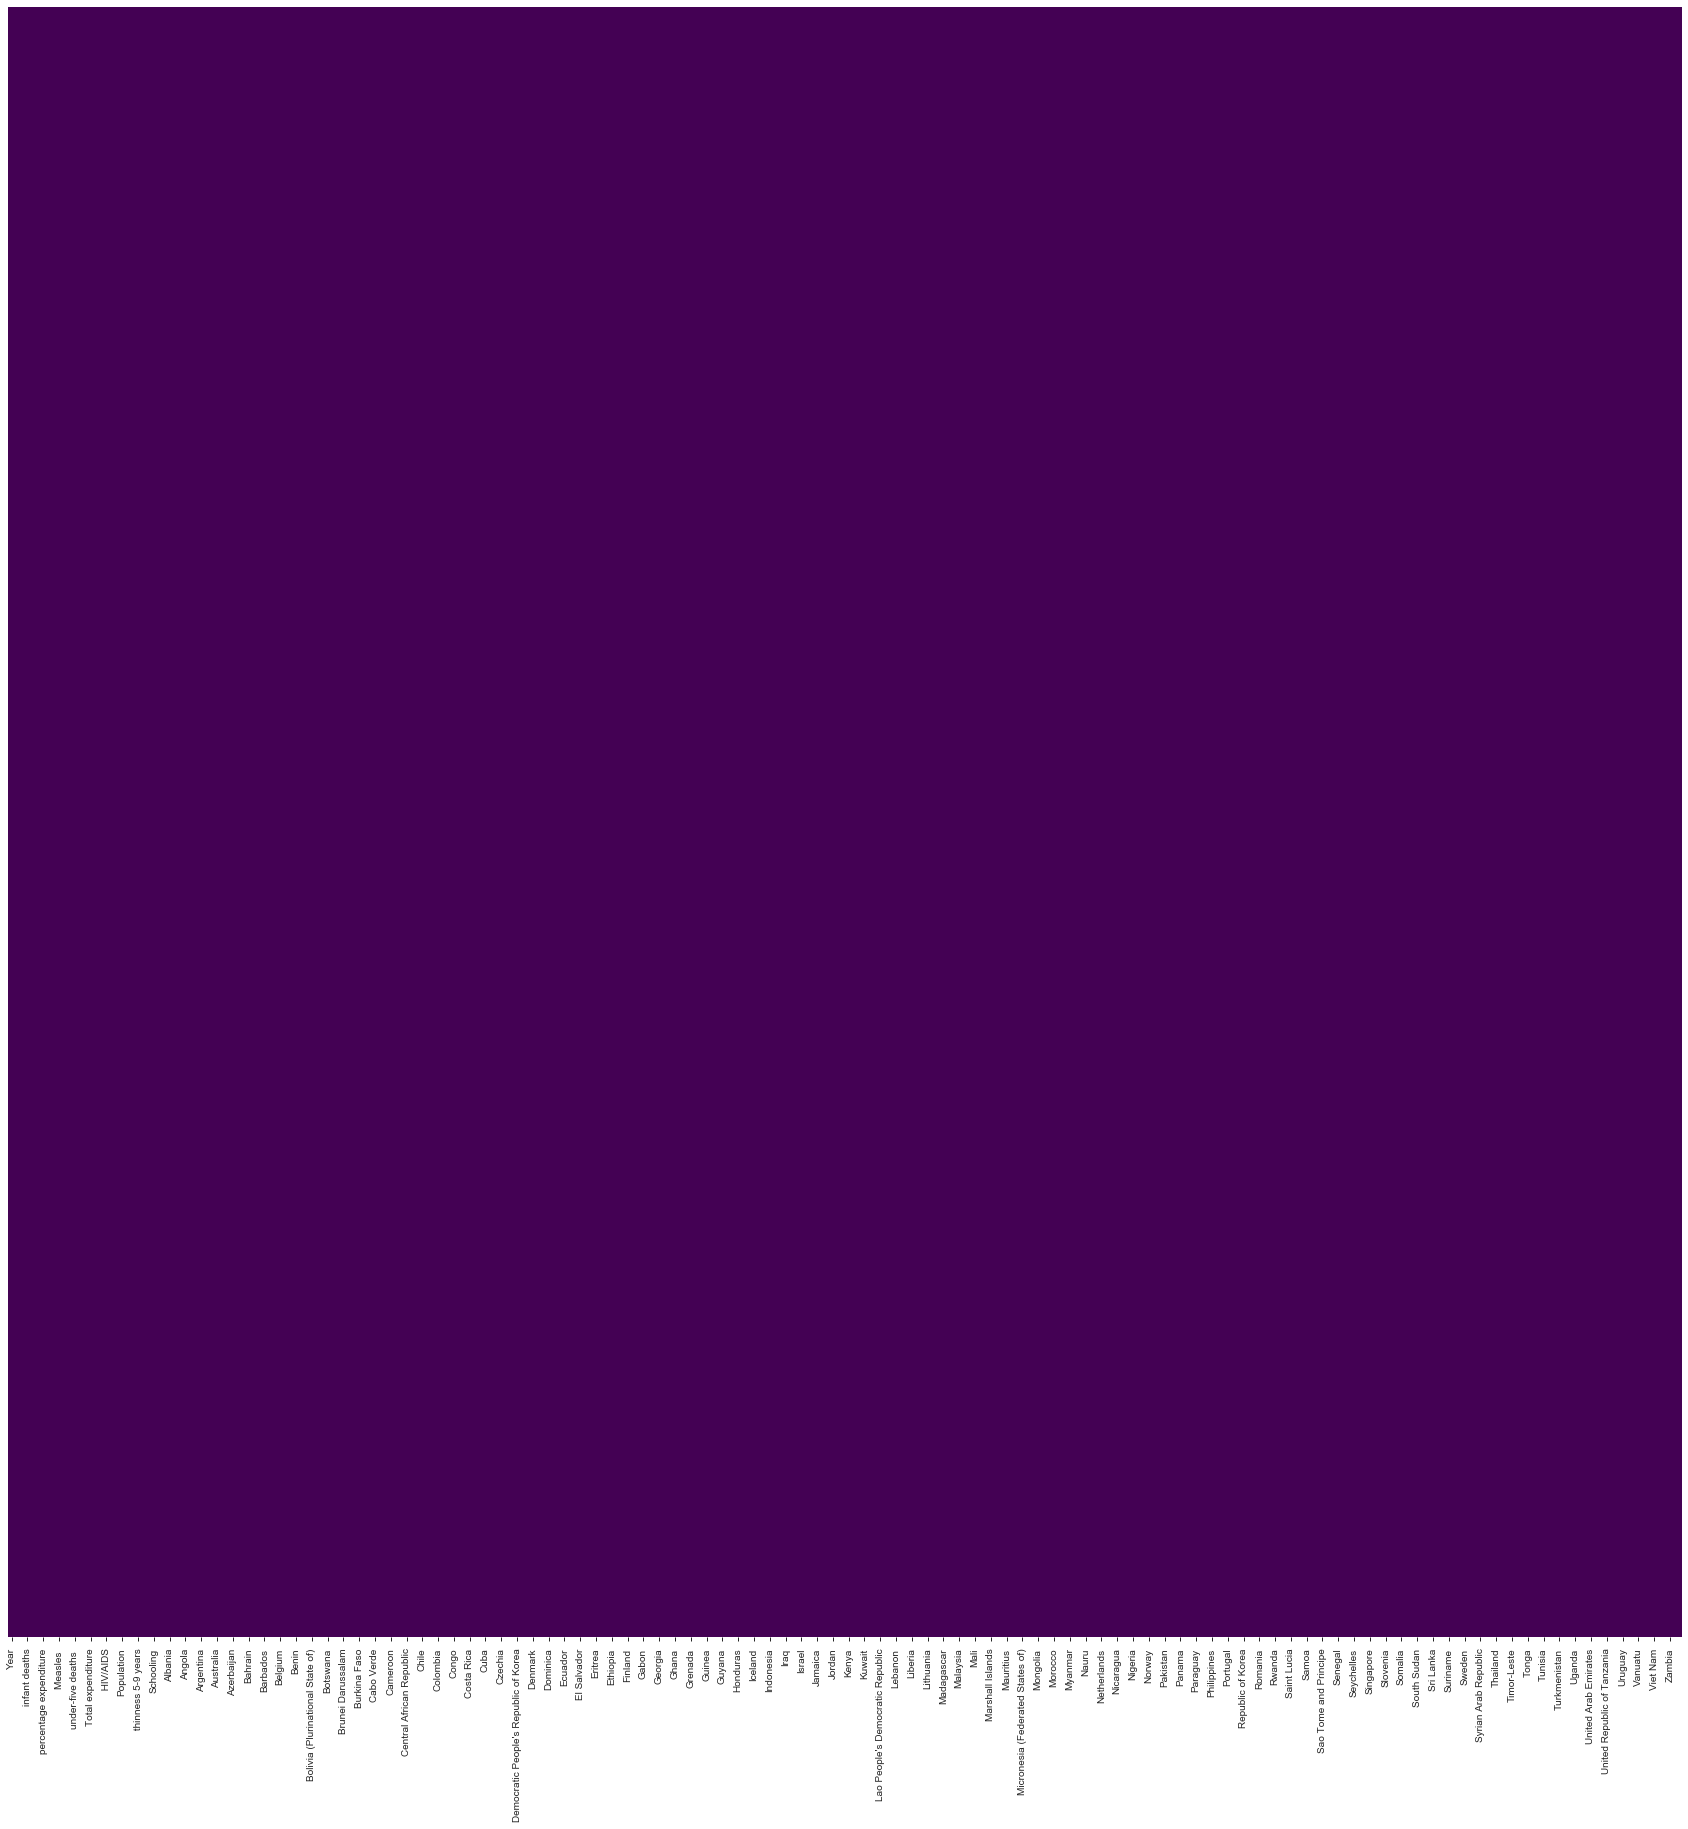

In [51]:
plt.figure(figsize=(30,30))
sns.heatmap(sample.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Figure size 2160x2160 with 0 Axes>

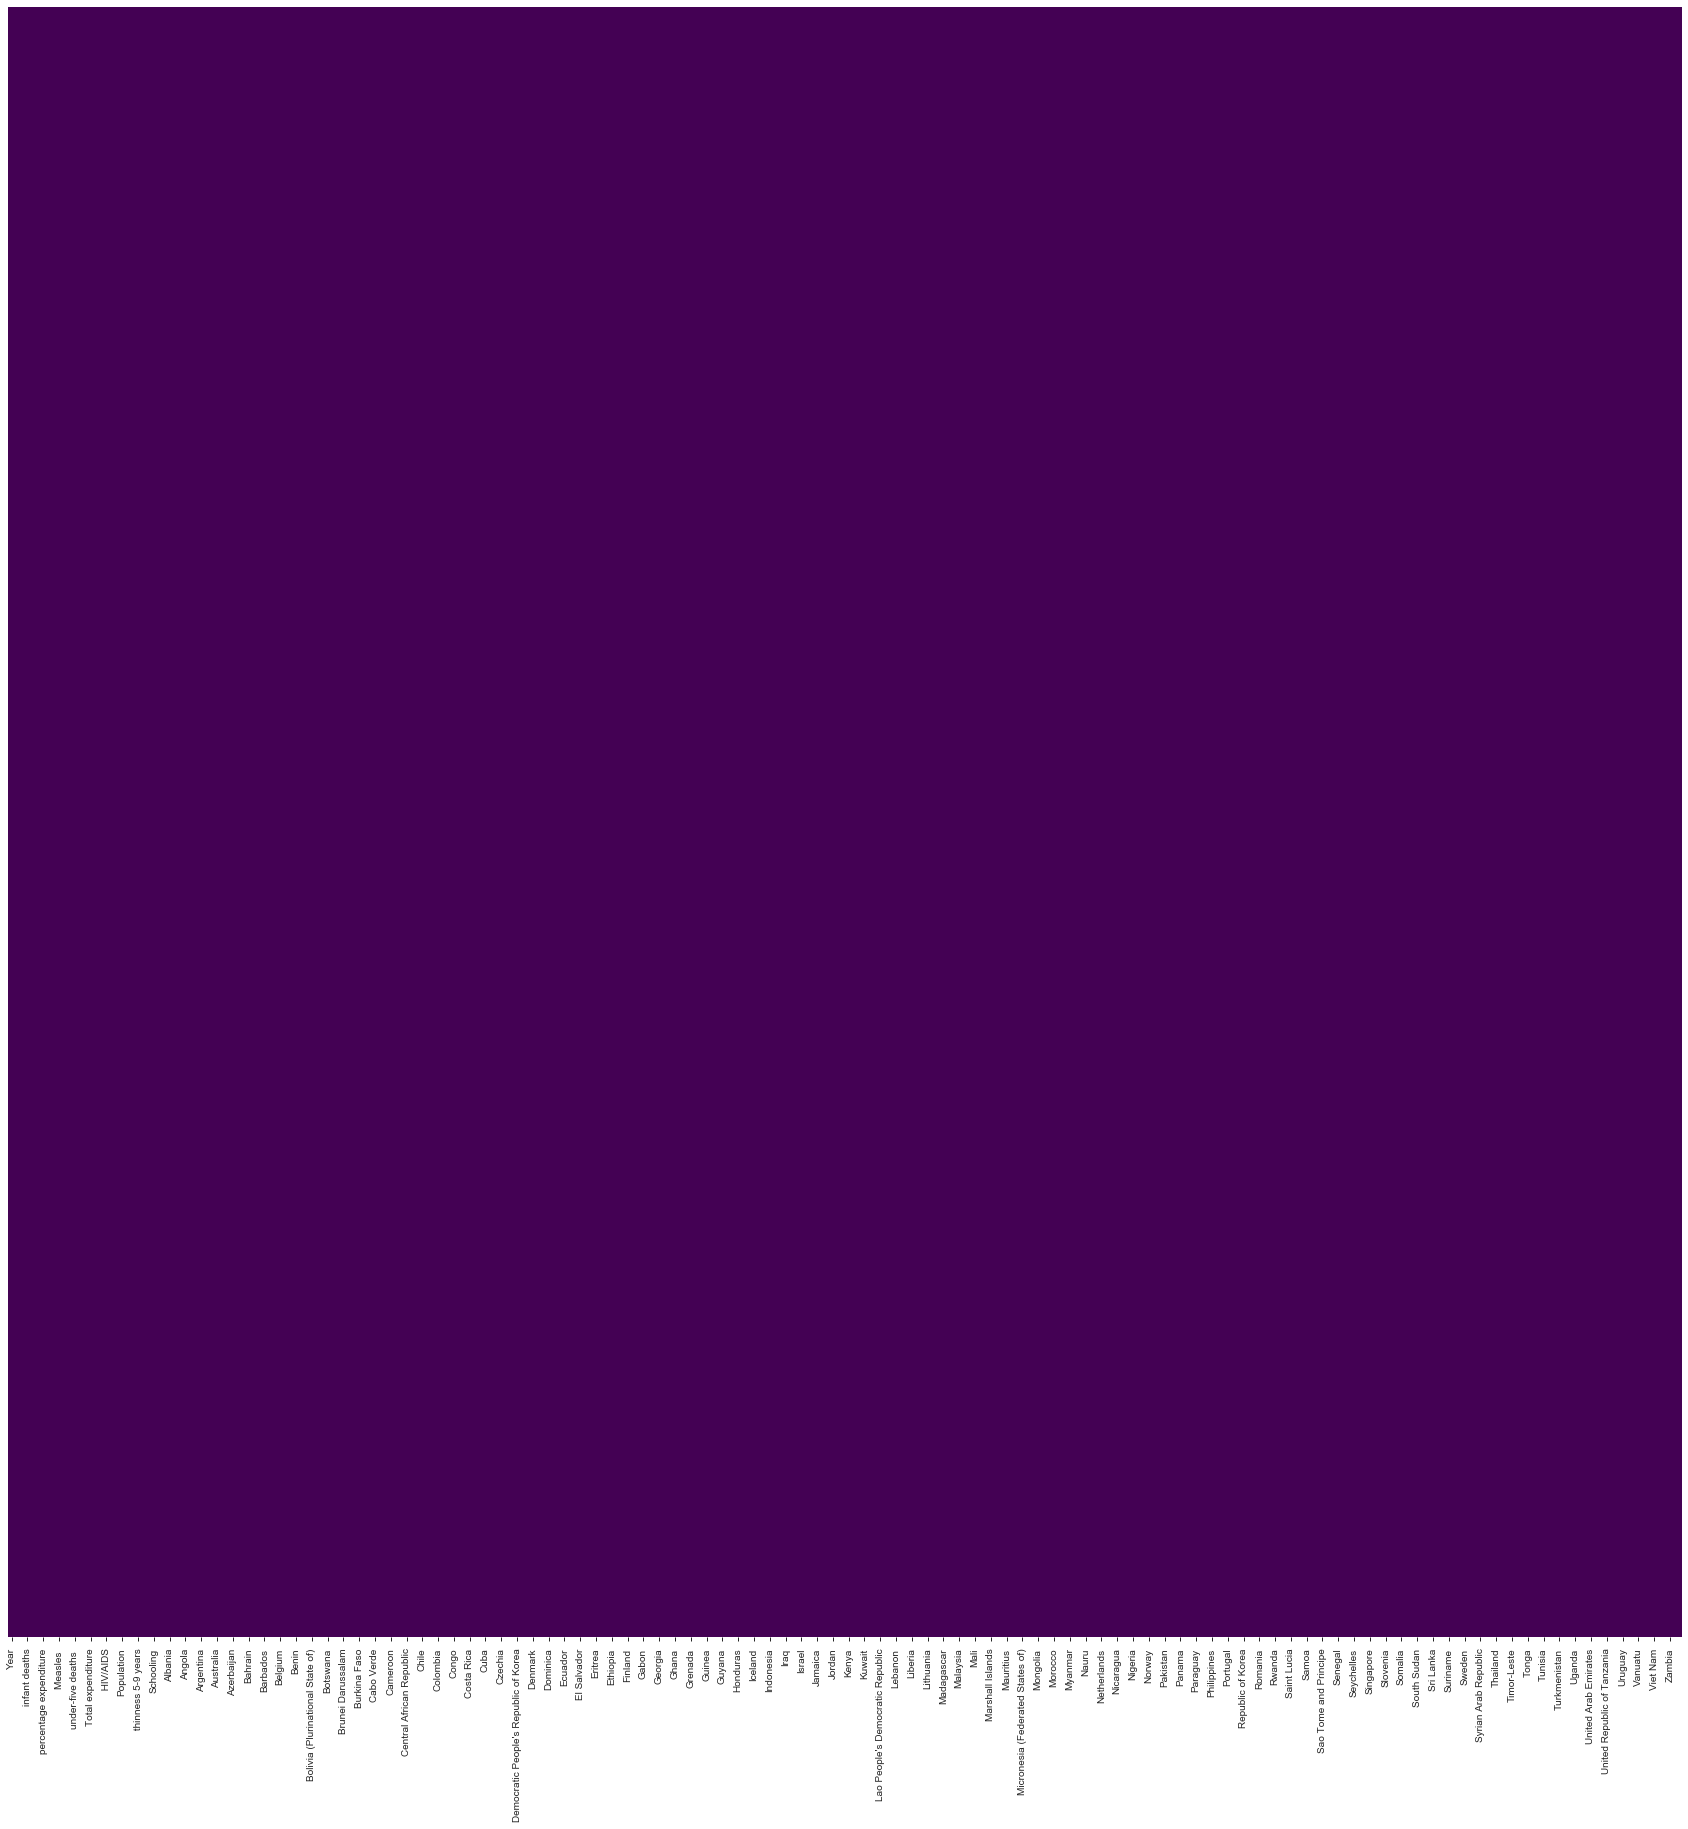

In [52]:
sample_test=pd.DataFrame(X_test,columns=X_test.columns)
plt.figure(figsize=(30,30))
sns.heatmap(sample_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Scaling

In [53]:
# the scaler - for standardization
from sklearn.preprocessing import StandardScaler
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

#  Time for Models - Simple Linear Regression

In [54]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)
print("Simple Linear Regressor Train Score", lreg.score(X_train, y_train))
print("Simple Linear Regression Test Score", lreg.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Simple Linear Regressor Train Score 0.9616746347171846
Simple Linear Regression Test Score -1.1499594127602408e+20


# Linear Regression using cross val score

In [57]:
#Linear Regression using cross val score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train,cv=3)

# Mean Cross validation Score
print("Cross-validation scores: {}".format(cv_scores))
print("Mean Cross-validation scores: {:.2f}".format(cv_scores.mean()))
# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("LR Performance Test: ", lr.score(X_test,y_test))

Cross-validation scores: [-2.55330675e+23 -9.56637975e+20 -1.58750985e+20]
Mean Cross-validation scores: -85482021450137424887808.00
lr.coef_: [ 1.19563106e+00 -1.72359883e-01  6.52493311e+00 -2.88433668e-01
  2.77939177e-01 -1.31280586e-01 -1.15858011e-01 -6.49561087e-02
 -6.80195445e+00  6.39652709e-02 -7.28385315e-02  2.03922110e-01
 -1.64906713e+00 -1.77467697e-01 -3.32236813e-02  6.00281688e-02
  1.54262473e-01 -4.14731304e-02  6.25540207e-01 -1.34348482e+13
  1.30750088e+00  1.07473541e+00 -4.89723087e-01  1.25798133e+00
  1.25521043e+00  9.96040645e-01 -2.78093453e+12 -2.67248930e+12
  9.70696981e-01  1.05050550e+00  1.16062648e+00  7.91994678e-01
  1.09498650e+00  7.74831776e-01 -2.44083106e+12  8.08669239e-01
 -3.98835422e-02  4.59656665e-01  7.24809069e-01  1.25194338e+00
  2.78068113e-01  9.25300802e-01  1.39424241e+00 -2.88520577e+12
  7.78120127e-03 -6.96449826e-02  9.24350786e-01  4.43829072e-01
 -1.41443332e-01  1.56099492e+00 -4.64058569e-01 -2.82184913e-01
  1.50788584

# Linear Regression with SGD and GridSearchCv

In [64]:
# Linear Regression with SGD and GridSearchCv

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#sgd=SGDRegressor(max_iter=1000, tol = 1e-5, eta0=0.01)
reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=10000, tol = 1e-6))
])

param_sgd = {'sgd_reg__eta0':[0.01, 0.05, 0.1 ,0.5]}
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')
grid_sgd.fit(X_train, y_train)

X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print()

print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_sgd.best_score_))
print()
print("Best estimator:\n{}".format(grid_sgd.best_estimator_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('sgd_reg',
                                        SGDRegressor(alpha=0.0001,
                                                     average=False,
                                                     early_stopping=False,
                                                     epsilon=0.1, eta0=0.01,
                                                     fit_intercept=True,
                                                     l1_ratio=0.15,
                                                     learning_rate='invscaling',
                                                     loss='squared_loss',
                                                     max_iter=10000,
         

train mse: 3.8738266515623727
train rmse: 1.9682039151374464
train r2: 0.956456742372362

test mse: 4.98265847170008
test rmse: 2.232186925797228
test r2: 0.9467088615658603

Best parameters: {'sgd_reg__eta0': 0.5}
Best cross-validation score: -5.09

Best estimator:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('sgd_reg',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.5, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=1e-06,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)


# Ridge Regression using GridSearchCV

In [55]:
#Ridge Regression using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()


#define a list of parameters
param_ridge = {'alpha':np.logspace(-4,1,30)}

grid_ridge = GridSearchCV(ridge, param_ridge, cv=4, return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance

print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 1.48735211e-04, 2.21221629e-04, 3.29034456e-04,
       4.89390092e-04, 7.27895384e-04, 1.08263673e-03, 1.61026203e-03,...
       1.17210230e-02, 1.74332882e-02, 2.59294380e-02, 3.85662042e-02,
       5.73615251e-02, 8.53167852e-02, 1.26896100e-01, 1.88739182e-01,
       2.80721620e-01, 4.17531894e-01, 6.21016942e-01, 9.23670857e-01,
       1.37382380e+00, 2.04335972e+00, 3.03919538e+00, 4.52035366e+00,
       6.72335754e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best Mean Cross-validation score: 0.9494802894617114

Ridge parameters:  {'alpha': 4.52035365636025}
Ridge.coef_: [ 1.12020667e+00 -1.93329093e-01  8.87559374e-01 -1.77978041e-01
  2.59393465e-01 -1.23745541e-01 -1.13516556e-01 -1.36488807e-03
 -1.46993673e+00  1.22104155e-01 -1.07417287e-01  2.35861954e-01
 -1.64770296e+00 -1.32924264e-01 -2.49856108e-02 -1.84861708e-01
 -1.70611978e-02  3.49542228e-02  8.60246382e-01 -3.22889535e+00
  9.62144321e-01  8.14202306e-01 -6.91707052e-01  9.90867384e-01
  8.94198666e-01  6.98676507e-01  6.16681616e-01  7.07435831e-01
  6.39290854e-01  7.68909214e-01  8.62286550e-01  6.38108391e-01
  7.88421185e-01  4.57292459e-01  6.08905640e-01  4.74609933e-01
 -2.20291331e-01  3.30225750e-01  3.71790615e-01  9.86452990e-01
 -2.99535836e-02  6.81099572e-01  1.06601972e+00  1.27877563e-01
 -2.35847012e-01 -2.83012429e-01  6.14377965e-01  2.61938154e-01
 -3.55546179e-01  1.23601178e+00 -6.47021844e-01 -4.79557301e-01
  1.14274524e+00  8.75270918e-01  8.78011

# Lasso Regression with GridSearchCV

In [56]:
#Lasso Regression with GridSearchCV

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42)

#define a list of parameters
param_lasso = {'alpha':np.logspace(-4,4,50) }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=4, return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

# Check test data set performance
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best Mean Cross-validation score: 0.95

Lasso parameters:  {'alpha': 0.0020235896477251557}
Lasso.coef_: [ 1.12015849e+00 -1.93056785e-01  1.35001440e+00 -1.89626855e-01
  2.38514596e-01 -1.19254322e-01 -1.12905004e-01  0.00000000e+00
 -1.96784961e+00  1.18964712e-01 -1.10882990e-01  2.31724656e-01
 -1.66210043e+00 -1.12100323e-01 -2.01131784e-02 -1.77714255e-01
 -0.00000000e+00  2.31648064e-02  8.45388277e-01 -6.26796334e+00
  9.63664697e-01  8.12666917e-01 -6.87989362e-01  9.89496619e-01
  8.98768092e-01  6.99266877e-01 -1.04822019e-03  1.07279010e-01
  6.38777024e-01  7.71307428e-01  8.61588059e-01  6.32728171e-01
  7.89780715e-01  4.59245850e-01  6.00152907e-02  4.74709427e-01
 -2.20701644e-01  3.20110247e-01  3.72753373e-01  9.86520377e-01
 -2.60284413e-02  6.79924731e-01  1.06492778e+00 -5.18833160e-01
 -2.33624001e-01 -2.83389612e-01  6.12570881e-01  2.56007291e-01
 -3.51850105e-01  1.24218747e+00 -6.49314973e-01 -4.77982378e-01
  1.14730096e+00  8.69862023e-01  8.79074274e-01  

# Elastic net using GridSearchCV

In [60]:
#Elastic net using GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elasticnet = ElasticNet()


param_elasticnet = {'alpha':np.logspace(-4,1,30), 'l1_ratio' :[0.1,0.2,0.3,0.4]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True)
grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 1.48735211e-04, 2.21221629e-04, 3....
       1.17210230e-02, 1.74332882e-02, 2.59294380e-02, 3.85662042e-02,
       5.73615251e-02, 8.53167852e-02, 1.26896100e-01, 1.88739182e-01,
       2.80721620e-01, 4.17531894e-01, 6.21016942e-01, 9.23670857e-01,
       1.37382380e+00, 2.04335972e+00, 3.03919538e+00, 4.52035366e+00,
       6.72335754e+00, 1.00000000e+01]),
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

Training set score:  0.9626978229832762
Test score:  0.9541294088267227
Best parameters:  {'alpha': 0.002395026619987486, 'l1_ratio': 0.1}
Best cross-validation score: 0.9501459390873109


# KNN Regressor using GridSearchCV

In [59]:
# KNN Regressor using GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_knn=Pipeline([ 
    ('scaler',MinMaxScaler()),
    ('knnreg', KNeighborsRegressor())
    
])

param_knn = {'knnreg__n_neighbors': range(1,8)}

#apply grid search
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

print('train score: ', grid_knn.score(X_train, y_train))
print('test score: ', grid_knn.score(X_test, y_test))

#find best parameters
print('Best parameters: ', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('knnreg',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'knn

train score:  0.9868610505740978
test score:  0.9467948943026484
Best parameters:  {'knnreg__n_neighbors': 2}
Best cross-validation score: 0.9476459476271972


# Polynomial Regression using GridSearchCV

In [61]:
# Polynomial Regression using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('norm_reg', LinearRegression())
    
])
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,3)}

grid_poly = GridSearchCV(pipe_poly, param_poly,cv=2, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')


grid_poly.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

#find best parameters
print('Best parameters: ', grid_poly.best_params_)
print('Best cross validation score: ', grid_poly.best_score_)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('norm_reg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
  

train mse: 2.0749152885040918e-24
train rmse: 1.440456624999202e-12
train r2: 1.0

test mse: 303.9784458456165
test rmse: 17.43497765543783
test r2: -2.251147460850585
Best parameters:  {'polynomialfeatures__degree': 2}
Best cross validation score:  -2795.942219483571


# Decision Tree Regressor

In [62]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)

#define a list of parameters
param_dtree = {'max_depth': range(1,10),'min_samples_split':range(2,10,1),'criterion':['mse','mae']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(1, 10),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

Best Mean Cross-validation score: 0.90

Decision Tree parameters:  {'criterion': 'mse', 'max_depth': 9, 'min_samples_split': 6}
Decision Tree Performance:  0.924306151786243


# SVR using GridSearchCV

In [54]:
#SVR using GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr=SVR()
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1,10],
               'gamma': [ 0.01, 0.1, 1,10,100]},
              {'kernel': ['poly'],
               'degree':[1,2],
               'C': [0.001, 0.01, 0.1, 1,10],
               'gamma': [ 0.01, 0.1, 1,10,100]},
              {'kernel': ['sigmoid'],
               'C': [0.001, 0.01, 0.1, 1,10],
               'gamma': [ 0.01, 0.1, 1,10,100]}]
grid_svr = GridSearchCV(svr, param_grid, cv=3,
                          return_train_score=True)
grid_svr.fit(X_train, y_train)
print('train score: ', grid_svr.score(X_train, y_train))
print('test score: ', grid_svr.score(X_test, y_test))
print("Best parameters: {}".format(grid_svr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svr.best_score_))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10],
                          'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [1, 2],
                          'gamma': [0.01, 0.1, 1, 10, 100],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'gamma': [0.01, 0.1, 1, 10, 100],
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

train score:  0.9738108647364264
test score:  0.9574573944858228
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.95


# Results

After running several models SVR provides the best results for the dataset and the results are shown below:
    
-- Train score: 97.38%
    
-- Test score:  95.74%
    
-- Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
    
-- Best cross-validation score: 95.63% 